In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = 'data/iris.data'

### Dataset Description

- Number of features for each data-point: 4
- Number of classes: 3 (although we need to cluster the data points to identify what works the best)

### Read data from file in X, y

In [3]:
iris = pd.read_csv(data_path, sep=',', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'])

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# Each class has 50 datapoints
iris.type.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: type, dtype: int64

In [6]:
for i, flower_type in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    iris.loc[iris['type'] == flower_type, 'type'] = i

In [7]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()

In [8]:
X.shape

(150, 4)

In [9]:
y = iris[['type']].to_numpy()

In [10]:
y.shape

(150, 1)

### k-Means Clustering

In [11]:
class KMeans:
    
    def __init__(self, k=3, tolerance=0.0001):
        self.k = k
        self.tolerance = tolerance
        
    def fit(self, X, max_iters=500):
        self.centroids = self._init_centroids(X)
        #print(self.centroids)
        
        # Create empty clusters based on the value of k
        # This will be used to store the data points that lie on the respective clusters
        self.clusters = {i: [] for i in range(self.k)}
        
        # Calculate distances of each data point from the centroids
        # Find the one with the minimum and assign to that cluster
        trained = False
        iters = 0
        while not trained or not iters < max_iters:
            y_pred = []
            for data_point in X:
                distances = [np.linalg.norm(data_point - centroid) for _, centroid in self.centroids.items()]
                # Take the index of the one with the minimum distance and assign that cluster to the data point
                pred_cluster = distances.index(min(distances))
                y_pred.append(pred_cluster)
                self.clusters[pred_cluster].append(data_point)
                
            # Calculate the new centroids based on the new clusters
            prev_centroids = dict(self.centroids)
            self.centroids = self._get_centroids(self.clusters)
            trained = self._is_trained(prev_centroids, self.centroids)
            iters += 1
            
        print(f'Iterations taken === {iters}')
        return np.array(y_pred)
                
    
    def _init_centroids(self, X):
        centroid_ids = np.random.choice(X.shape[0], self.k, replace=False)
        return {i: X[c_id] for i, c_id in enumerate(centroid_ids)}
    
    def _get_centroids(self, clusters):
        centroids = dict()
        for i in clusters:
            centroids[i] = np.average(clusters[i], axis=0)
            
        #print(centroids)
        return centroids
    
    def _is_trained(self, prev_centroids, new_centroids):
        diffs = []
        for i in prev_centroids:
            diff = np.average(np.subtract(prev_centroids[i], new_centroids[i]))
            diffs.append(abs(diff))
        if max(diffs) <= self.tolerance:
            return True
        else:
            return False

### Plotting cluserting results for validation

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [13]:
# Take first two features for plotting the graph
def plot_clusters(data, y_pred, ax):
    colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'yellow', 5: 'gray', 6: 'cyan'}
    y_pred = [colors[pred] for pred in y_pred]
    x = data[:, 0]
    y = data[:, 1]
    ax.scatter(x, y, c=y_pred, s=50)

In [14]:
def visualize_results(y_pred, k):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))
    fig.suptitle(f'2D plots when clusters={k}')
    plot_clusters(data=X[:, :2], y_pred=y_pred, ax=ax1)
    plot_clusters(data=X[:, 2:], y_pred=y_pred, ax=ax2)
    plot_clusters(data=X[:, 1:3], y_pred=y_pred, ax=ax3)

### Fitting k-Means Clustering

Iterations taken === 24
Iterations taken === 103
Iterations taken === 37


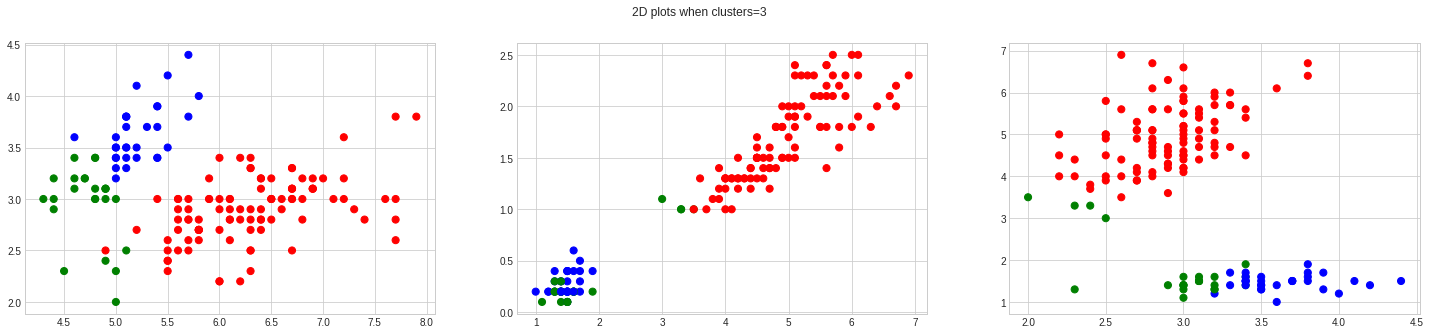

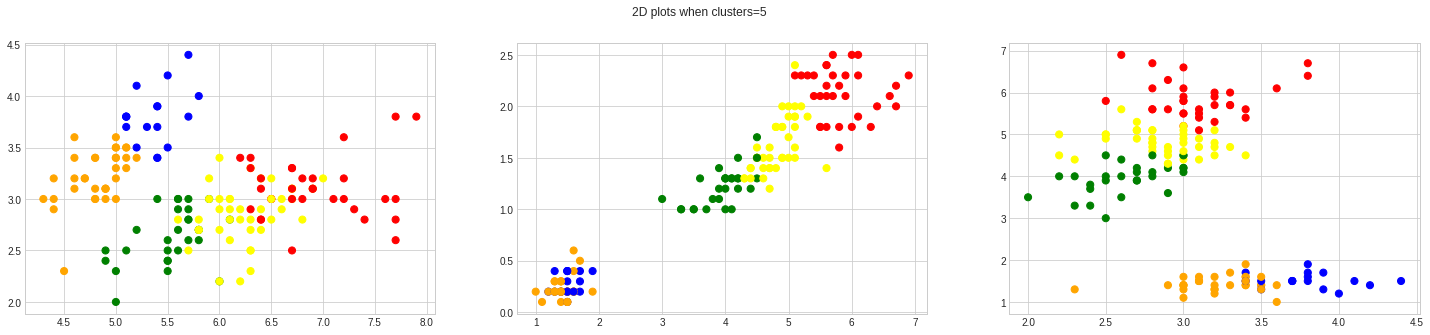

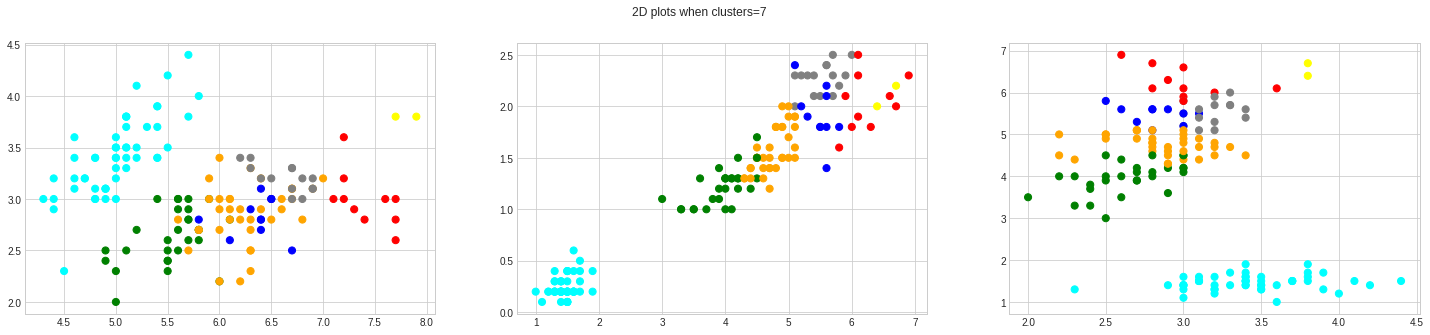

In [15]:
for k in [3, 5, 7]:
    k_means = KMeans(k=k)
    y_pred = k_means.fit(X)
    #print(f'\n----{k}-clusters----')
    #print(y_pred)
    (pred_type, counts) = np.unique(y_pred, return_counts=True)
    freq = np.asarray((pred_type, counts)).T
    #print(freq)
    visualize_results(y_pred, k)